In [2]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'



In [15]:
df=pd.read_csv('../../data/final-data.csv')

In [16]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.765204,1.518438,0.521852,10.999824,15.402308,0.156082,2.432182
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.848630,0.499720,0.286644,8.059673,7.121038,0.086332,0.117692
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,-5.000000,2.090000,0.000000,1.257400
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.200000,1.000000,0.277000,6.259000,10.025000,0.098521,2.385175
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.600000,2.000000,0.528000,8.900000,14.842000,0.156242,2.451670
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000,13.165000,19.385000,0.197404,2.509750
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,83.500000,85.400000,1.000000,2.640925


In [17]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865,0.191740,2.453403,Original
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665,0.194048,2.442677,Original
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450,0.196299,2.434675,Original
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065,0.216384,2.433603,Original
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050,0.183564,2.430550,Original


In [18]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [7]:
# df1['Well Name']
# [df1['Well Name']=='ALEXANDER D']

for item in df['Well Name'].unique():
    print(item, len(df['Well Name'][df['Well Name']==item]))


SHRIMPLIN 471
ALEXANDER D 466
SHANKLE 449
LUKE G U 461
KIMZEY A 439
CROSS H CATTLE 501
NOLAN 415
Recruit F9 80
NEWBY 463
CHURCHMAN BIBLE 404


In [8]:
df[df['Well Name']=='Recruit F9'].head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
3202,9,C LM,Recruit F9,3018.0,32.78,0.723,1.2,13.110,5.1,2,0.186,12.510,13.710,0.064476,2.433685,Original
3203,9,C LM,Recruit F9,3018.5,23.50,0.711,0.3,12.300,5.2,2,0.176,12.150,12.450,0.038037,2.447050,Original
3204,9,C LM,Recruit F9,3019.0,28.33,0.706,0.5,11.790,5.3,2,0.167,11.540,12.040,0.051798,2.455465,Original
3205,9,C LM,Recruit F9,3019.5,31.12,0.704,1.7,11.325,5.3,2,0.157,10.475,12.175,0.059746,2.463138,Original
3206,9,C LM,Recruit F9,3020.0,28.68,0.709,1.9,11.165,5.4,2,0.147,10.215,12.115,0.052795,2.465778,Original


## impute PE-----replace with same facies mean

In [19]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density', 'PE_filled'],
      dtype='object')

In [20]:
for i in range(1, 10):
    mask = df['Facies'] == i
    mean = df.loc[mask, 'PE'].mean()
    df.loc[mask, 'PE'] = df.loc[mask, 'PE'].fillna(mean)


In [21]:
df[df['Well Name']=='Recruit F9'].head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
3202,9,C LM,Recruit F9,3018.0,32.78,0.723,1.2,13.110,5.1,2,0.186,12.510,13.710,0.064476,2.433685,Original
3203,9,C LM,Recruit F9,3018.5,23.50,0.711,0.3,12.300,5.2,2,0.176,12.150,12.450,0.038037,2.447050,Original
3204,9,C LM,Recruit F9,3019.0,28.33,0.706,0.5,11.790,5.3,2,0.167,11.540,12.040,0.051798,2.455465,Original
3205,9,C LM,Recruit F9,3019.5,31.12,0.704,1.7,11.325,5.3,2,0.157,10.475,12.175,0.059746,2.463138,Original
3206,9,C LM,Recruit F9,3020.0,28.68,0.709,1.9,11.165,5.4,2,0.147,10.215,12.115,0.052795,2.465778,Original


### save df after PE imputation


In [22]:
import pickle
pickle.dump(df,open('df.pickled','wb'))


### random choose data by facies (10% of each facies)

In [23]:
import random
import numpy as np
select_rate=0.1
temp_list=[]
for name in df['Facies'].unique():
    
# facies_name=df1['Facies'].unique()
# type(facies_name[2])
# temp_facies=facies_name[2]
    facies_index=df[df['Facies']==name].index.values
    random.seed(888)
    b=random.sample(range(0, len(facies_index)), int(len(facies_index)*select_rate))
    print(len(b))
    temp_list=np.append(facies_index[b],temp_list)
    

78
94
68
58
14
27
29
18
26


In [24]:
temp_list.shape

(412,)

In [26]:
test_set_df=df.loc[temp_list.astype(int)]

In [27]:
test_set_df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,4.497573,2902.864078,65.550723,0.666213,3.808080,13.070295,3.753293,1.512136,0.519505,11.166255,14.974335,0.157839,2.434340
std,2.471737,136.971136,31.471161,0.252806,5.446765,7.508307,0.841672,0.500460,0.294861,8.688014,7.218129,0.089661,0.123887
min,1.000000,2573.500000,11.761000,0.021189,-18.600000,1.755000,1.795000,1.000000,0.010000,-0.595000,2.355000,0.004593,1.727402
25%,2.000000,2807.375000,45.850250,0.513662,1.295000,8.050000,3.200000,1.000000,0.270000,6.288000,9.682500,0.101713,2.387312
50%,4.000000,2928.500000,64.745000,0.645113,3.704500,11.727750,3.600000,2.000000,0.519000,8.740000,14.228500,0.155544,2.456492
75%,6.000000,3006.125000,80.645000,0.825250,7.000000,15.920500,4.309577,2.000000,0.781500,13.191625,19.346500,0.200843,2.517175
max,9.000000,3133.000000,305.870000,1.528000,18.200000,55.915000,6.422000,2.000000,1.000000,65.065000,46.765000,0.842508,2.621043


In [28]:
test_set_df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
1071,1,B1 SH,SHANKLE,2842.0,52.720,0.590000,2.2,9.88,3.200,1,0.367,8.78,10.98,0.121285,2.486980,Original
2594,1,B4 SH,CROSS H CATTLE,2729.0,54.345,0.160168,1.4,16.20,2.975,1,0.732,15.50,16.90,0.125914,2.382700,Original
2600,1,B4 SH,CROSS H CATTLE,2732.0,61.969,0.157457,4.2,17.80,2.863,1,0.625,15.70,19.90,0.147635,2.356300,Original
2629,1,B4 SH,CROSS H CATTLE,2746.5,79.285,0.313234,5.1,14.75,2.849,1,0.107,12.20,17.30,0.196968,2.406625,Original
2551,1,B3 SH,CROSS H CATTLE,2708.0,68.186,0.519040,2.0,11.80,3.162,1,0.540,10.80,12.80,0.165347,2.455300,Original


In [29]:
a=[index for index in df.index.values.astype(int).tolist()  if index not in temp_list.astype(int).tolist()]
len(a)

3737

In [30]:
type(np.array(a))

numpy.ndarray

In [31]:
train_set_df=df.loc[np.array(a)]

In [32]:
train_set_df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865,0.191740,2.453403,Original
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665,0.194048,2.442677,Original
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450,0.196299,2.434675,Original
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065,0.216384,2.433603,Original
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050,0.183564,2.430550,Original


In [33]:
train_set_df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density
count,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000
mean,4.503880,2907.308804,64.865990,0.658833,4.468016,13.215483,3.766517,1.519133,0.522110,10.981475,15.449491,0.155888,2.431945
std,2.474938,132.900638,30.174506,0.252715,5.252294,7.091140,0.849495,0.499701,0.285763,7.988407,7.109653,0.085967,0.117004
min,1.000000,2574.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000,-5.000000,2.090000,0.000000,1.257400
25%,2.000000,2822.500000,44.710000,0.495000,1.667000,8.540000,3.200000,1.000000,0.278000,6.255000,10.100000,0.098464,2.385026
50%,4.000000,2933.000000,65.001000,0.639000,4.300000,12.050000,3.600000,2.000000,0.528000,8.944500,14.880000,0.156273,2.451175
75%,6.000000,3007.000000,79.340000,0.821000,7.562000,16.059000,4.300000,2.000000,0.767000,13.164000,19.400000,0.197125,2.509090
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000,83.500000,85.400000,1.000000,2.640925


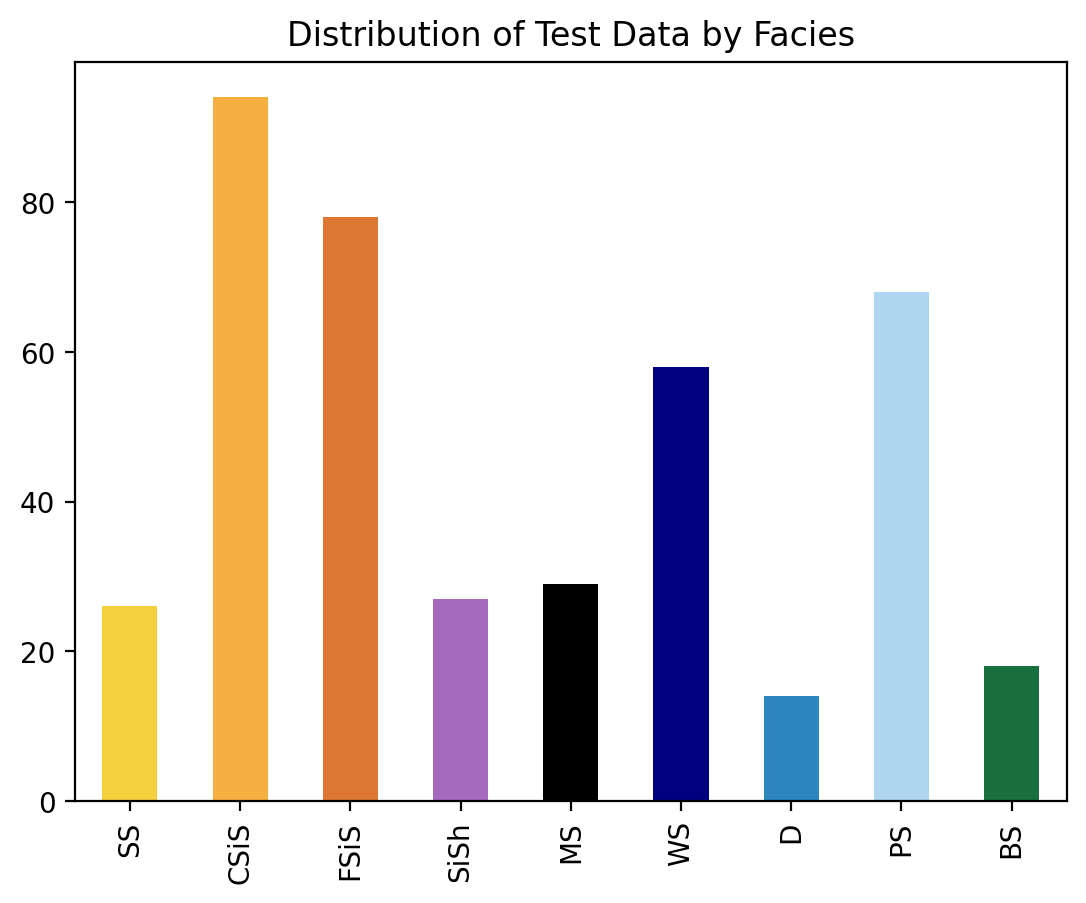

In [34]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
import matplotlib.pyplot as plt
# 1=sandstone  2=c_siltstone   3=f_siltstone # 4=marine_silt_shale 
#5=mudstone 6=wackestone 7=dolomite 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041', '#DC7633','#A569BD',
       '#000000', '#000080', '#2E86C1', '#AED6F1', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_counts = test_set_df['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, 
                   
                   title='Distribution of Test Data by Facies')
plt.show()

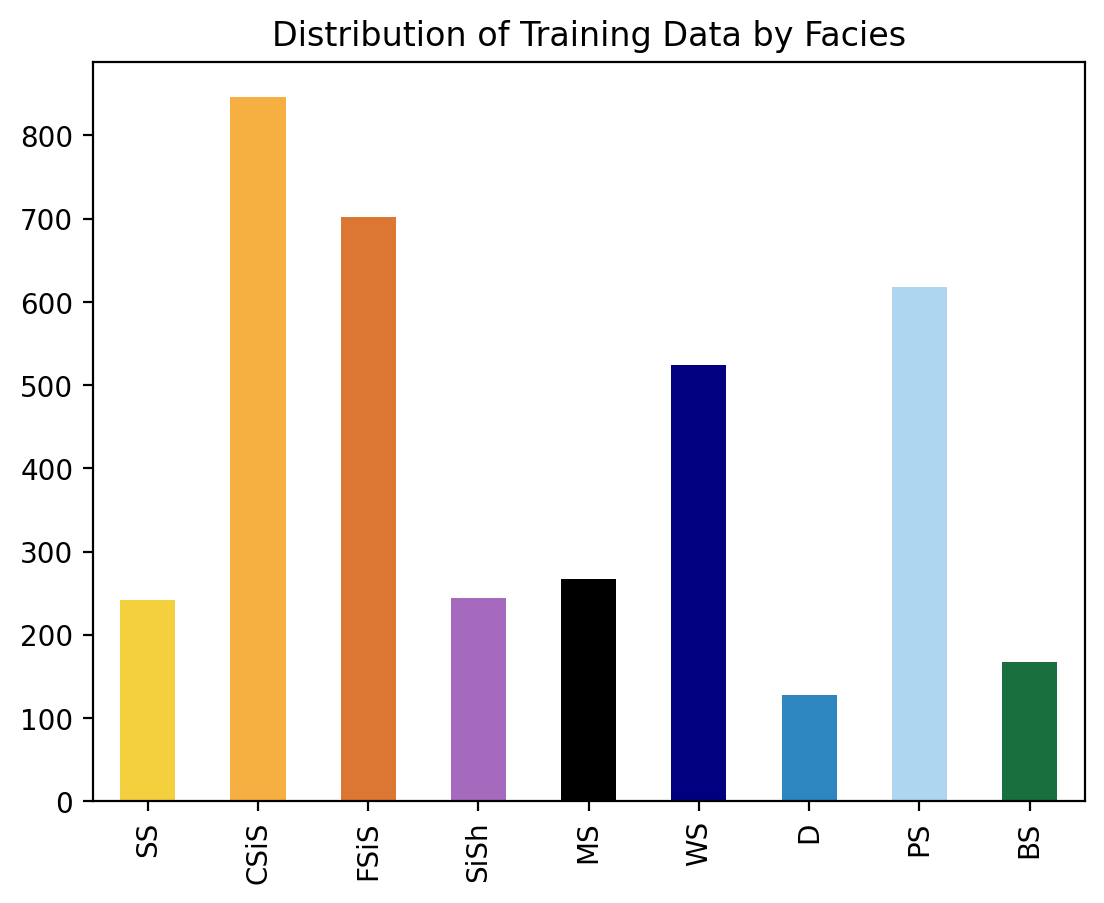

In [35]:
facies_counts = train_set_df['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, title='Distribution of Training Data by Facies')
plt.show()


In [36]:


import pickle
pickle.dump(train_set_df,open('train_set_df.pickled','wb'))
pickle.dump(test_set_df,open('test_set_df.pickled','wb'))

